# # Food-101 Challenge

Thomas Butterfield

In [1]:
import os
import glob
import zipfile
import functools
import sys
import random
import pickle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
# mpl.rcParams['figure.figsize'] = (12,12)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.image as mpimg
import pandas as pd
from PIL import Image

import tensorflow as tf
import tensorflow.contrib as tfcontrib
from tensorflow.python.keras import layers
from tensorflow.python.keras import losses
from tensorflow.python.keras import models
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.initializers import glorot_uniform

from tensorflow.contrib.slim.python.slim.nets.resnet_utils import *

from tensorflow.python.keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.python.keras.models import Model, load_model
from tensorflow.python.keras.optimizers import SGD
from tensorflow.python.keras.utils.np_utils import to_categorical




from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions 


from keras import layers
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)


In [2]:
food101_dir = '/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/'

In [3]:
Test_Image_Label_df = pd.read_json(food101_dir+'meta/test.json')
Train_Image_Label_df = pd.read_json(food101_dir+'meta/train.json')

In [4]:
Test_Image_Label_df.head()

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1061830,hot_and_sour_soup/1000486,samosa/1009326,sashimi/100113,pork_chop/1012227,spring_rolls/1005480,panna_cotta/1006650,beef_tartare/101073,greek_salad/1010850,foie_gras/1007306,...,chicken_quesadilla/10257,pho/1002382,prime_rib/1006976,cheesecake/1023543,ice_cream/1004744,omelette/1019294,grilled_cheese_sandwich/1000938,lobster_roll_sandwich/1002698,nachos/1011831,oysters/1005672
1,churros/1064042,hot_and_sour_soup/1004564,samosa/1024186,sashimi/1017182,pork_chop/1019077,spring_rolls/103010,panna_cotta/1027460,beef_tartare/1029120,greek_salad/1029680,foie_gras/1044237,...,chicken_quesadilla/1030292,pho/1020153,prime_rib/102197,cheesecake/102854,ice_cream/1031536,omelette/1058816,grilled_cheese_sandwich/1003050,lobster_roll_sandwich/1029665,nachos/101954,oysters/1017801
2,churros/1074903,hot_and_sour_soup/1011278,samosa/1036216,sashimi/1043094,pork_chop/102958,spring_rolls/1036175,panna_cotta/1030883,beef_tartare/1030025,greek_salad/1053670,foie_gras/1073688,...,chicken_quesadilla/1052529,pho/1026354,prime_rib/102813,cheesecake/1073148,ice_cream/1075106,omelette/1116874,grilled_cheese_sandwich/1005927,lobster_roll_sandwich/103891,nachos/103312,oysters/1019666
3,churros/1085259,hot_and_sour_soup/1029400,samosa/103689,sashimi/1050391,pork_chop/1040432,spring_rolls/1044858,panna_cotta/103712,beef_tartare/1031053,greek_salad/1062715,foie_gras/1113614,...,chicken_quesadilla/1096804,pho/1028507,prime_rib/1035695,cheesecake/1092082,ice_cream/1100243,omelette/1122818,grilled_cheese_sandwich/100694,lobster_roll_sandwich/104300,nachos/1044020,oysters/1040557
4,churros/1097261,hot_and_sour_soup/1044215,samosa/1052427,sashimi/10551,pork_chop/1045605,spring_rolls/1067952,panna_cotta/1050629,beef_tartare/1066933,greek_salad/1101710,foie_gras/1125178,...,chicken_quesadilla/1102036,pho/1029709,prime_rib/105375,cheesecake/1096018,ice_cream/1106165,omelette/1145379,grilled_cheese_sandwich/1052563,lobster_roll_sandwich/1046809,nachos/1060157,oysters/1044823


In [5]:
Train_Image_Label_df.head()

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1004234,hot_and_sour_soup/1002782,samosa/1008131,sashimi/1001239,pork_chop/1000802,spring_rolls/1002160,panna_cotta/1001332,beef_tartare/1000431,greek_salad/1007149,foie_gras/1004944,...,chicken_quesadilla/1004279,pho/1005681,prime_rib/1001089,cheesecake/1001446,ice_cream/1012277,omelette/1001719,grilled_cheese_sandwich/1003153,lobster_roll_sandwich/100009,nachos/100284,oysters/1008124
1,churros/1013460,hot_and_sour_soup/1003688,samosa/1011601,sashimi/1001363,pork_chop/1006233,spring_rolls/1003056,panna_cotta/1003460,beef_tartare/1005746,greek_salad/1009138,foie_gras/1008577,...,chicken_quesadilla/1009225,pho/1011443,prime_rib/1006320,cheesecake/1004515,ice_cream/101858,omelette/1007843,grilled_cheese_sandwich/10060,lobster_roll_sandwich/1001432,nachos/1009513,oysters/1016229
2,churros/1016791,hot_and_sour_soup/1008185,samosa/101365,sashimi/1002556,pork_chop/1019530,spring_rolls/1003507,panna_cotta/1011097,beef_tartare/1009672,greek_salad/1010520,foie_gras/1011711,...,chicken_quesadilla/1011413,pho/1012513,prime_rib/100945,cheesecake/1004807,ice_cream/102595,omelette/1015300,grilled_cheese_sandwich/1007544,lobster_roll_sandwich/100646,nachos/1011394,oysters/1023832
3,churros/102100,hot_and_sour_soup/1008701,samosa/1015943,sashimi/1007253,pork_chop/1019569,spring_rolls/1008736,panna_cotta/1013000,beef_tartare/1012128,greek_salad/1011665,foie_gras/1017233,...,chicken_quesadilla/1023828,pho/1019401,prime_rib/10120,cheesecake/1017408,ice_cream/1044117,omelette/1029915,grilled_cheese_sandwich/1013343,lobster_roll_sandwich/100655,nachos/1013641,oysters/103236
4,churros/1025494,hot_and_sour_soup/1008924,samosa/1016296,sashimi/1010510,pork_chop/1025391,spring_rolls/1012525,panna_cotta/1020036,beef_tartare/1027680,greek_salad/1012989,foie_gras/1023512,...,chicken_quesadilla/1024740,pho/1021371,prime_rib/1016126,cheesecake/1021942,ice_cream/104465,omelette/1038109,grilled_cheese_sandwich/1016030,lobster_roll_sandwich/100702,nachos/1014846,oysters/1038150


In [6]:
Images_dir = food101_dir+'images/'

In [7]:
LCM = []

Labels_df = pd.read_csv(food101_dir+'meta/labels.txt', index_col = None, header = None, names = ['Labels'])
LCM.append(Labels_df)

Classes_df = pd.read_csv(food101_dir+'meta/classes.txt', index_col = None, header = None, names = ['Classes'])
LCM.append(Classes_df)

Labels_Classes_Mapping = pd.concat(LCM, axis=1)
Labels_Classes_Mapping.head()

,Labels,Classes
0,Apple pie,apple_pie
1,Baby back ribs,baby_back_ribs
2,Baklava,baklava
3,Beef carpaccio,beef_carpaccio
4,Beef tartare,beef_tartare


In [8]:
# Filepath of image (key), Label of image (value)
Test_Image_ds = {}
Train_Image_ds = {}
Valid_Image_ds = {}

for i in Test_Image_Label_df:
    index = 0
    for b in Labels_Classes_Mapping['Classes']:
        if i == b:
            Label = index
            break
        
        index += 1
    
    for a in Test_Image_Label_df[i]:
        Test_Image_ds[Images_dir+a+'.jpg'] = Label

for i in Train_Image_Label_df:
    index = 0
    for b in Labels_Classes_Mapping['Classes']:
        if i == b:
            Label = index
            index = 0
            break
        
        index += 1
    
    for a in Train_Image_Label_df[i]:
        Train_Image_ds[Images_dir+a+'.jpg'] = Label

In [9]:
# Label = Labels_Classes_Mapping['Labels'][index] #To get labels from index's

In [10]:
num_train_examples = len(Train_Image_ds)
num_test_examples = len(Test_Image_ds)
num_val_examples = len(Valid_Image_ds)
print("Number of training examples: {}".format(num_train_examples))
print("Number of validation examples: {}".format(num_val_examples))
print("Number of testing examples: {}".format(num_test_examples))

Number of training examples: 75750
Number of validation examples: 0
Number of testing examples: 25250


In [11]:
Train_ImgLabel_List = list(Train_Image_ds.items())
Valid_ImgLabel_List = list(Valid_Image_ds.items())
Test_ImgLabel_List = list(Test_Image_ds.items())

In [12]:
Train_ImgLabel_List, Valid_ImgLabel_List = \
                    train_test_split(Train_ImgLabel_List, test_size=0.2, random_state=42)

In [13]:
print('Training Set:\n', Train_ImgLabel_List[:3], '\n')
print('Validation Set:\n', Valid_ImgLabel_List[:3], '\n')
print('Test Set:\n', Test_ImgLabel_List[:3])

Training Set:
 [('/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/spring_rolls/3700593.jpg', 92), ('/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/waffles/948929.jpg', 100), ('/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/cheesecake/1751518.jpg', 16)] 

Validation Set:
 [('/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/frozen_yogurt/2584688.jpg', 45), ('/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/donuts/3570357.jpg', 31), ('/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/omelette/3520398.jpg', 67)] 

Test Set:
 [('/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/churros/1061830.jpg', 23), ('/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/churros/1064042.jpg', 23), ('/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/churros/1074903.jpg', 23)]


In [14]:
num_train_examples = len(Train_ImgLabel_List)
num_test_examples = len(Test_ImgLabel_List)
num_val_examples = len(Valid_ImgLabel_List)
print("Number of training examples: {}".format(num_train_examples))
print("Number of validation examples: {}".format(num_val_examples))
print("Number of testing examples: {}".format(num_test_examples))

Number of training examples: 60600
Number of validation examples: 15150
Number of testing examples: 25250


In [15]:
random.shuffle(Test_ImgLabel_List)

In [16]:
Train_Img_Filepaths = []
Train_Labels = []
Valid_Img_Filepaths = []
Valid_Labels = []
Test_Img_Filepaths = []
Test_Labels = []

for i in Train_ImgLabel_List:
    Train_Img_Filepaths.append(i[0])
    Train_Labels.append(i[1])
for i in Valid_ImgLabel_List:
    Valid_Img_Filepaths.append(i[0])
    Valid_Labels.append(i[1])
for i in Test_ImgLabel_List:
    Test_Img_Filepaths.append(i[0])
    Test_Labels.append(i[1])

# Some examples to show lists made here?

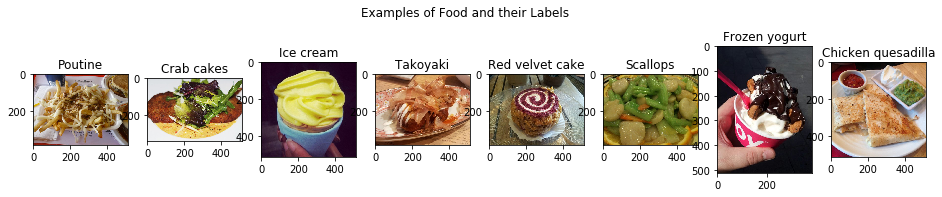

In [17]:
display_num = 8
r_choices = np.random.choice(num_train_examples, display_num)

plt.figure(figsize=(16, 3))
for i in range(0, display_num, 1):
    img_num = r_choices[i]
    plt.subplot(1, 8, i+1)
    plt.imshow(mpimg.imread(Train_Img_Filepaths[img_num]))
    plt.title(Labels_Classes_Mapping['Labels'][Train_Labels[img_num]])
    
plt.suptitle("Examples of Food and their Labels")
plt.show()

In [18]:

n_classes = 101
Train_Labels = np.array(Train_Labels)
Test_Labels = np.array(Test_Labels)
Valid_Labels = np.array(Valid_Labels)
train_label_cat = to_categorical(Train_Labels, num_classes=n_classes)
test_label_cat = to_categorical(Test_Labels, num_classes=n_classes)
valid_label_cat = to_categorical(Valid_Labels, num_classes=n_classes)


In [19]:
train_label_cat 


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
img_shape = (64, 64, 3)
batch_size = 32
epochs = 1

In [21]:
def _process_pathnames(img_filepath):
    
    img_str = tf.read_file(img_filepath)
    img = tf.image.decode_jpeg(img_str, channels=3)
    return img

In [22]:
def shift_img(output_img, width_shift_range, height_shift_range):
    if width_shift_range or height_shift_range:
        if width_shift_range:
            width_shift_range = tf.random_uniform([], 
                                                  -width_shift_range * img_shape[1],
                                                  width_shift_range * img_shape[1])
        if height_shift_range:
            height_shift_range = tf.random_uniform([], 
                                                   -height_shift_range * img_shape[0],
                                                   height_shift_range * img_shape[0])
     
        output_img = tfcontrib.image.translate(output_img,
                                             [width_shift_range, height_shift_range])
        
    return output_img

In [23]:
def flip_img(horizontal_flip, tr_img):
    if horizontal_flip:
        flip_prob = tf.random_uniform([], 0.0, 1.0)
        tr_img = tf.cond(tf.less(flip_prob, 0.5), 
                         lambda: (tf.image.flip_left_right(tr_img)), 
                         lambda: (tr_img))
    return tr_img

In [24]:
def _augment(img,
             resize=None,  # Resize the image to some size e.g. [256, 256]
             scale=1,  # Scale image e.g. 1 / 255.
             hue_delta=0,  # Adjust the hue of an RGB image by random factor
             horizontal_flip=False,  # Random left right flip,
             width_shift_range=0,  # Randomly translate the image horizontally
             height_shift_range=0):  # Randomly translate the image vertically 
    if resize is not None:
    # Resize both images
        img = tf.image.resize_images(img, resize)
  
    if hue_delta:
        img = tf.image.random_hue(img, hue_delta)
  
    img = flip_img(horizontal_flip, img)
    img = shift_img(img, width_shift_range, height_shift_range)
    img = tf.to_float(img) * scale 
    return img

In [25]:
def get_baseline_dataset(filenames, 
                         labels,
                         preproc_fn=functools.partial(_augment),
                         threads=5, 
                         batch_size=batch_size,
                         shuffle=True):           
    num_x = len(filenames)
    
    # Create a dataset from the filenames and labels
    img_dataset = tf.data.Dataset.from_tensor_slices(filenames)
    
    # Map our preprocessing function to every element in our dataset, taking
    # advantage of multithreading
    img_dataset = img_dataset.map(_process_pathnames, num_parallel_calls=threads)
    if preproc_fn.keywords is not None and 'resize' not in preproc_fn.keywords:
        assert batch_size == 1, "Batching images must be of the same size"
    
    img_dataset = img_dataset.map(preproc_fn, num_parallel_calls=threads)
    label_dataset = tf.data.Dataset.from_tensor_slices(tf.cast(labels, tf.int32))
    dataset = tf.data.Dataset.zip((img_dataset, label_dataset))
    
    print(dataset)
    
    if shuffle:
        dataset = dataset.shuffle(num_x)
  
  
    # It's necessary to repeat our data for all epochs 
    dataset = dataset.repeat().batch(batch_size)
    return dataset

In [26]:
def process_imgs_easy(filenames,
                     preproc_fn=functools.partial(_augment)):
    count = 0
    filenames = filenames[:100]
    for i in filenames:
        print(count)
        imgProc = _process_pathnames(i)
        imgF = preproc_fn(imgProc)
        Test_Img_List.append(imgF)
        count += 1

In [27]:
train_config = {
    'resize': [img_shape[0], img_shape[1]],
    'scale': 1 / 255.,
    'hue_delta': 0.1,
    'horizontal_flip': True,
    'width_shift_range': 0.1,
    'height_shift_range': 0.1
}
train_preprocessing_fn = functools.partial(_augment, **train_config)

In [28]:
valid_config = {
    'resize': [img_shape[0], img_shape[1]],
    'scale': 1 / 255.,
}
valid_preprocessing_fn = functools.partial(_augment, **valid_config)

In [29]:
train_ds = get_baseline_dataset(Train_Img_Filepaths, 
                                train_label_cat,
                                preproc_fn=train_preprocessing_fn,
                                batch_size=batch_size)
valid_ds = get_baseline_dataset(Valid_Img_Filepaths, 
                                valid_label_cat,
                                preproc_fn=valid_preprocessing_fn,
                                batch_size=batch_size)
test_ds = get_baseline_dataset(Test_Img_Filepaths, 
                                test_label_cat,
                                preproc_fn=train_preprocessing_fn,
                                batch_size=batch_size)


W0701 13:32:13.778028 4535666112 deprecation.py:323] From <ipython-input-24-02718e1ac512>:17: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.


<DatasetV1Adapter shapes: ((64, 64, 3), (101,)), types: (tf.float32, tf.int32)>
<DatasetV1Adapter shapes: ((64, 64, 3), (101,)), types: (tf.float32, tf.int32)>
<DatasetV1Adapter shapes: ((64, 64, 3), (101,)), types: (tf.float32, tf.int32)>


temp_ds = get_baseline_dataset(Train_Img_Filepaths, 
                               train_label_cat,
                               preproc_fn=train_preprocessing_fn,
                               batch_size=7,
                               shuffle=False)
# Let's examine some of these augmented images
data_aug_iter = temp_ds.make_one_shot_iterator()
next_element = data_aug_iter.get_next()
for i in range(0,3):
    print('Data Augmentation Round '+str(i+1))
    with tf.Session() as sess: 
        batch_of_imgs, label = sess.run(next_element)
    
        # Running next element in our graph will produce a batch of images
        plt.figure(figsize=(16, 8))
        
        for a in range(0,7):
            img = batch_of_imgs[a]
            plt.subplot(1, 7, a+1)
            plt.imshow(img)
        
        plt.show()

In [30]:
model = ResNet50(include_top = False, weights=None, input_shape=img_shape, classes=n_classes, pooling='avg')

In [31]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [32]:

X = Flatten()(model.output)
X = Dense(n_classes, activation='softmax', name='fc' + str(n_classes), kernel_initializer = glorot_uniform(seed=0))(X)

W0701 13:32:18.429329 4535666112 deprecation.py:506] From /Users/tombutterfield/.virtualenvs/food101env/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [33]:
model2 = Model(inputs=[model.input], outputs=[X])

In [34]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
______________________________________________________________________________________________

In [35]:
#opt = SGD(lr=.01, momentum=.9)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
cus = str(epochs)+'noWeights'
save_model_path = food101_dir+'tmp/weights'+cus+'.hdf5'
cp = tf.keras.callbacks.ModelCheckpoint(filepath=save_model_path, monitor='val_loss', save_best_only=True, verbose=1)

In [37]:
evaluation = model2.evaluate(test_ds, steps=int(np.ceil(num_test_examples / float(batch_size))))

790/790 [==============================] - 237s 300ms/step - loss: 328.3045 - acc: 0.0104


history = model2.fit(train_ds, 
                   steps_per_epoch=int(np.ceil(num_train_examples / float(batch_size))),
                   epochs=epochs,
                   validation_data=valid_ds,
                   validation_steps=int(np.ceil(num_val_examples / float(batch_size))),
                   callbacks=[cp])

evaluation = model2.evaluate(test_ds, steps=int(np.ceil(num_test_examples / float(batch_size))))